<a href="https://colab.research.google.com/github/M-MWW/draft/blob/main/group_project8_draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [64]:
child_labor = pd.read_csv('https://raw.githubusercontent.com/M-MWW/draft/main/cas_project_01.csv')#  directly from GitHub
child_labor['GDP_per_capita'] = np.log(child_labor['GDP_per_capita'])
child_labor = child_labor.dropna()
child_labor

,Unnamed: 0,Entity,Year,Edu_Expenditure,cl_ratio,GDP_per_capita,Population
0,1,Afghanistan,2016,4.543970,9.300000,7.581259,14116916
1,2,Albania,2016,3.962090,5.500000,9.282793,611189
2,3,Algeria,2016,7.344343,7.500764,9.337910,10700395
3,4,Angola,2016,2.754937,30.100000,8.465442,7845165
4,5,Argentina,2016,5.545490,5.025251,10.090750,10583728
...,...,...,...,...,...,...,...
92,93,Uruguay,2016,4.364200,7.300000,9.796907,755934
93,94,Uzbekistan,2016,5.415237,5.100000,8.255723,8521229
95,96,Vietnam,2016,3.469070,10.900000,8.846538,21208004
97,98,Zambia,2016,3.747920,34.400000,7.918079,6038245


In [ ]:
child_labor_1=child_labor.copy()
child_labor_1['GDP_level']='high'
child_labor_1.loc[child_labor_1['GDP_per_capita']<child_labor['GDP_per_capita'].median(),"GDP_level"]="low"

child_labor_1

In [ ]:
print(child_labor.corr())

In [71]:
model_interaction1 = ols("cl_ratio~ GDP_level*Edu_Expenditure",data=child_labor_1)
result_interaction1=model_interaction1.fit() # Fit model
print(result_interaction1.summary())

                            OLS Regression Results                            
Dep. Variable:               cl_ratio   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     20.07
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           4.79e-10
Time:                        15:01:42   Log-Likelihood:                -370.61
No. Observations:                  94   AIC:                             749.2
Df Residuals:                      90   BIC:                             759.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [ ]:
sp1=sns.regplot(data = child_labor, x = 'Edu_Expenditure', y = 'cl_ratio', fit_reg = True)
sp1.set(xlabel='Government expenditure on education as share of GDP(%)',ylabel='cl_ratio',title='Relationship between Edu_Expenditure and child_labor_ratio')
plt.show()

In [ ]:
sp1=sns.regplot(data = child_labor, x = 'GDP_per_capita', y = 'cl_ratio', fit_reg = True)
sp1.set(xlabel='GDP_per_capita((k)$)',ylabel='cl_ratio',title='Relationship between GDP_per_capita and child_labor_ratio')
plt.show()

In [ ]:
model = ols('cl_ratio~GDP_per_capita+Edu_Expenditure',data=child_labor)
result=model.fit()
print(result.summary())

In [ ]:
model1 = ols('cl_ratio~GDP_per_capita',data=child_labor)
result1=model1.fit()
print(result.summary())

In [ ]:
model2 = ols('cl_ratio~Edu_Expenditure',data=child_labor)
result2=model2.fit()
print(result.summary())

In [ ]:
sp3=sns.regplot(x=child_labor['Edu_Expenditure'],y=result.resid,fit_reg=False)
sp3.set(xlabel='Government expenditure on education as share of GDP(%)',ylabel='Residuals',title='Plot of residuals against Government expenditure on education as share of GDP')
plt.axhline(y=0,ls="--",color="red")
plt.show()

In [ ]:
sp4=sns.regplot(x=child_labor['GDP_per_capita'],y=result.resid,fit_reg=False)
sp4.set(xlabel='GDP_per_capita(k)',ylabel='Residuals',title='Plot of residuals against GDP_per_capita')
plt.axhline(y=0,ls="--",color="red")
plt.xlim(6,9.5)
plt.show()

In [ ]:
sp5=sns.histplot(x=result.resid,kde=True)
sp5.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

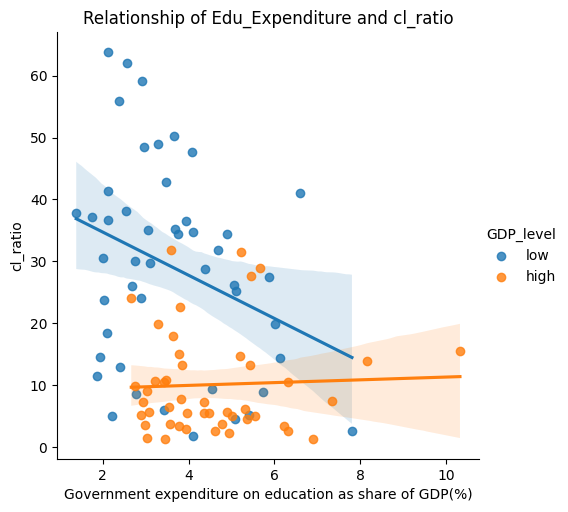

In [74]:
sp6 = sns.lmplot(data = child_labor_1, x = 'Edu_Expenditure', y = 'cl_ratio', hue = 'GDP_level', fit_reg = True)
sp6.set(xlabel='Government expenditure on education as share of GDP(%)',ylabel='cl_ratio',title='Relationship of Edu_Expenditure and cl_ratio')
plt.show

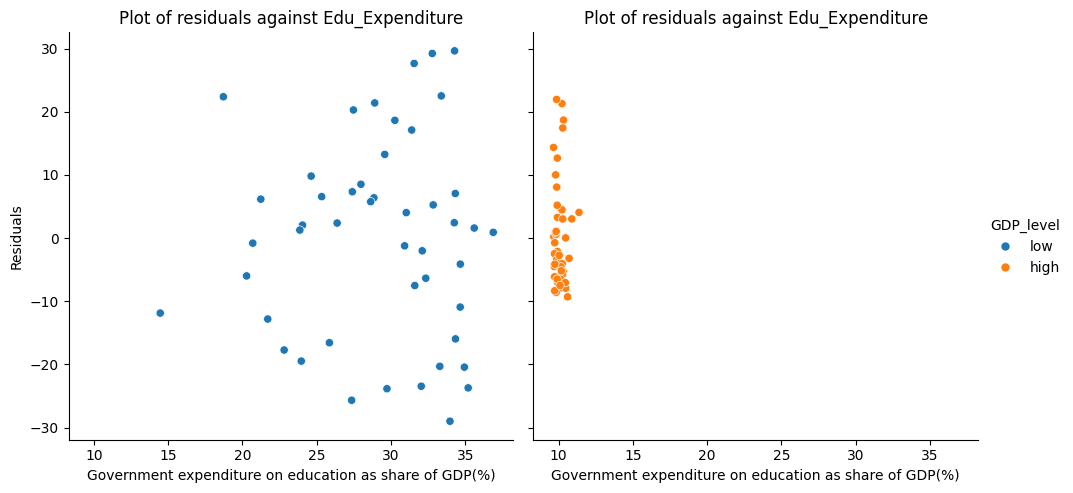

In [68]:
sp7=sns.relplot(x=result_interaction1.fittedvalues,y=result_interaction1.resid, hue =child_labor_1["GDP_level"],
               col=child_labor_1['GDP_level'],col_wrap=2)
sp7.set(xlabel='Government expenditure on education as share of GDP(%)',ylabel='Residuals',title='Plot of residuals against Edu_Expenditure')
plt.show()

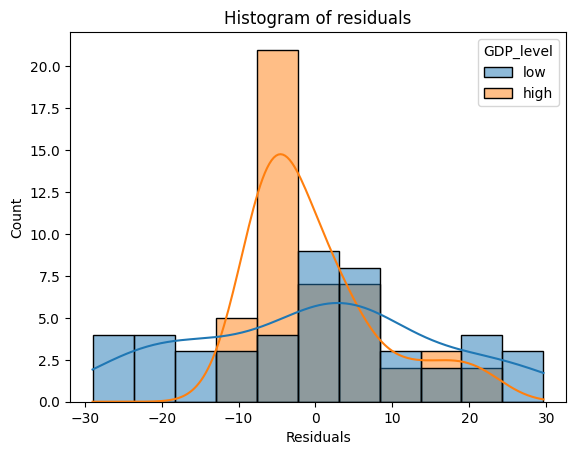

In [67]:
sp8=sns.histplot(x=result_interaction1.resid,kde=True,hue = child_labor_1["GDP_level"])
sp8.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()